In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

#  Can producers sacrifice some attributes (e.g., reducing sulfates or chlorides) without degrading quality too much?

In [16]:
df = pd.read_csv("combined_wine_quality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


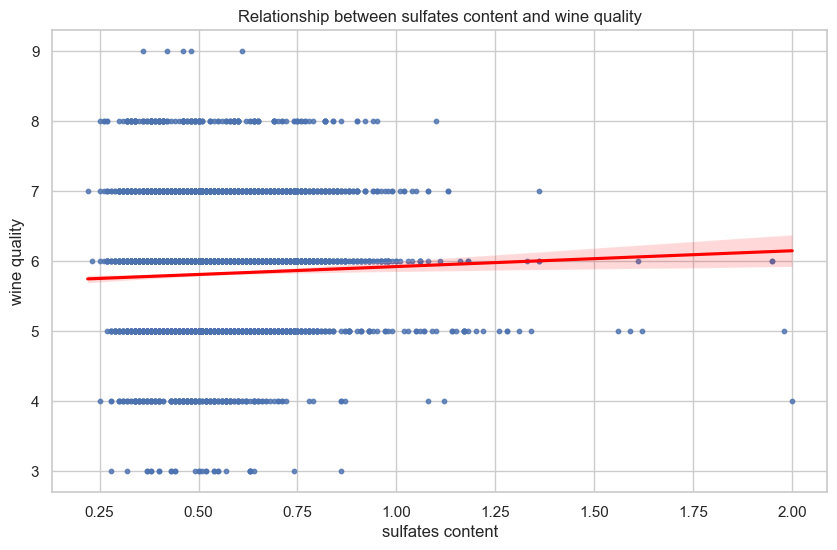

In [17]:
# Load your data
new_wine_data = pd.read_csv('combined_wine_quality.csv')

# Create a scatter plot with regression line for 'sulphates' vs 'quality'
plt.figure(figsize = (10,6))
sns.regplot(x='sulphates',y='quality',data=new_wine_data,scatter_kws={'s':10},line_kws={"color":"red"})
plt.title("Relationship between sulfates content and wine quality")
plt.xlabel('sulfates content')
plt.ylabel('wine quality')
plt.show()


## According to the graph, we can see that the regression line is almost horizaontal, which means the amounbt of sulfates won't affect

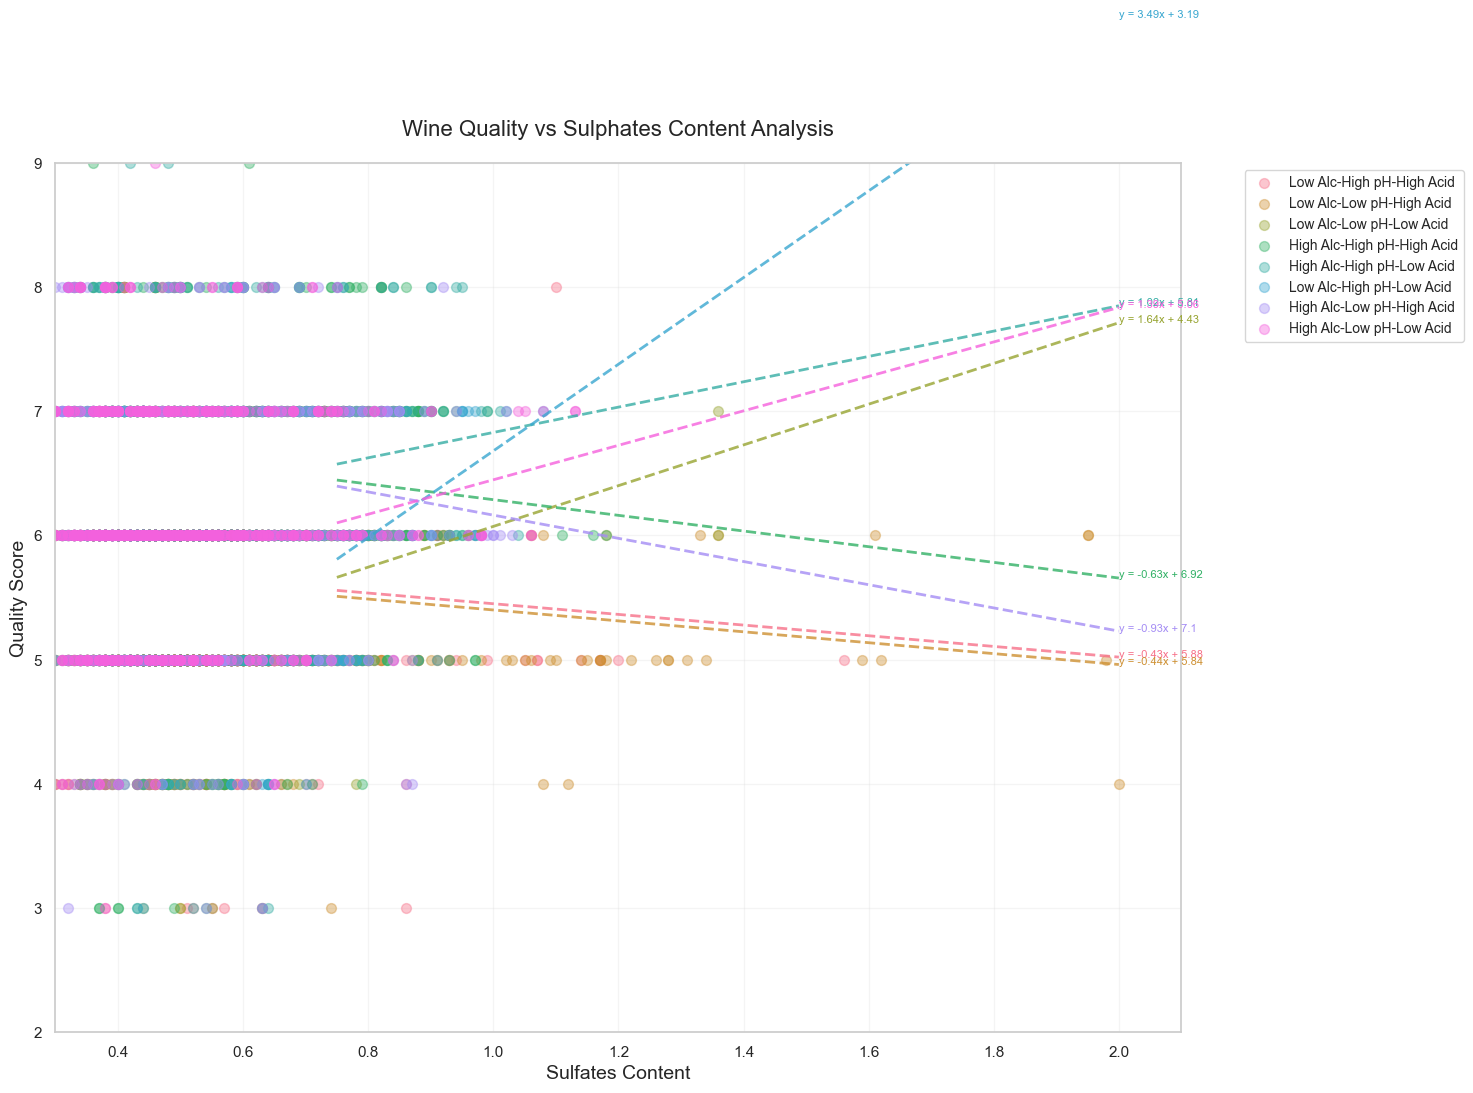

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('combined_wine_quality.csv')

# Calculate the median for each feature as a classification threshold
alcohol_threshold = df['alcohol'].median()
ph_threshold = df['pH'].median()
volatile_acidity_threshold = df['volatile acidity'].median()

# Define classification function covering all combinations
def classify_wine(row):
    if row['alcohol'] > alcohol_threshold and row['pH'] <= ph_threshold and row['volatile acidity'] <= volatile_acidity_threshold:
        return 'High Alc-Low pH-Low Acid'
    elif row['alcohol'] <= alcohol_threshold and row['pH'] <= ph_threshold and row['volatile acidity'] > volatile_acidity_threshold:
        return 'Low Alc-Low pH-High Acid'
    elif row['alcohol'] > alcohol_threshold and row['pH'] > ph_threshold and row['volatile acidity'] <= volatile_acidity_threshold:
        return 'High Alc-High pH-Low Acid'
    elif row['alcohol'] > alcohol_threshold and row['pH'] <= ph_threshold and row['volatile acidity'] > volatile_acidity_threshold:
        return 'High Alc-Low pH-High Acid'
    elif row['alcohol'] <= alcohol_threshold and row['pH'] > ph_threshold and row['volatile acidity'] <= volatile_acidity_threshold:
        return 'Low Alc-High pH-Low Acid'
    elif row['alcohol'] <= alcohol_threshold and row['pH'] > ph_threshold and row['volatile acidity'] > volatile_acidity_threshold:
        return 'Low Alc-High pH-High Acid'
    elif row['alcohol'] <= alcohol_threshold and row['pH'] <= ph_threshold and row['volatile acidity'] <= volatile_acidity_threshold:
        return 'Low Alc-Low pH-Low Acid'
    else:
        return 'High Alc-High pH-High Acid'

# add classification column
df['category'] = df.apply(classify_wine, axis=1)

# Set figure size
plt.figure(figsize=(15, 10))

# Set style and colors
sns.set(style='whitegrid')
colors = sns.color_palette('husl', n_colors=8)
category_colors = dict(zip(df['category'].unique(), colors))

# Plot scatter plot
for category in df['category'].unique():
    mask = df['category'] == category
    plt.scatter(df[mask]['sulphates'], df[mask]['quality'], 
               alpha=0.4, label=category, c=[category_colors[category]], s=50)

# Add regression line for each category (only in region where sulphates > 0.75)
for category in df['category'].unique():
    mask = (df['category'] == category) & (df['sulphates'] > 0.75)
    if sum(mask) > 1:
        X = df[mask]['sulphates'].values.reshape(-1, 1)
        y = df[mask]['quality'].values
        reg = LinearRegression().fit(X, y)
        
        X_pred = np.linspace(0.75, df['sulphates'].max(), 100).reshape(-1, 1)
        y_pred = reg.predict(X_pred)
        
        plt.plot(X_pred, y_pred, '--', c=category_colors[category], alpha=0.8, linewidth=2)
        
        # Label the equation at the end of the regression line
        equation = 'y = ' + str(round(reg.coef_[0], 2)) + 'x + ' + str(round(reg.intercept_, 2))
        plt.text(X_pred[-1], y_pred[-1], equation, fontsize=8, color=category_colors[category])

# Add title, labels, and legend
plt.title('Wine Quality vs Sulphates Content Analysis', fontsize=16, pad=20)
plt.xlabel('Sulfates Content', fontsize=14)
plt.ylabel('Quality Score', fontsize=14)
plt.grid(True, alpha=0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Set axis limits;lt.xlim(0.3, df['sulphates'].max() + 0.1)
plt.ylim(2, 9)

plt.show()


## 1 
### By keeping the X axis as the sulfate content, you can directly see the trend of the influence of different combinations (such as high alcohol content, low pH, etc.) on the quality of the wine under different sulfate content. This chart layout is suitable to answer your initial question about whether producers can reduce certain attributes without significantly reducing quality.

## 2
### The size of the intercept reflects the baseline potential impact of each combination on the quality score under certain initial conditions.

## 3
### High Alcohol, Low pH, High Volatile Acidity
### Low Alcohol, High pH, Low Volatile Acidity
### Low Alcohol, High pH, High Volatile Acidity

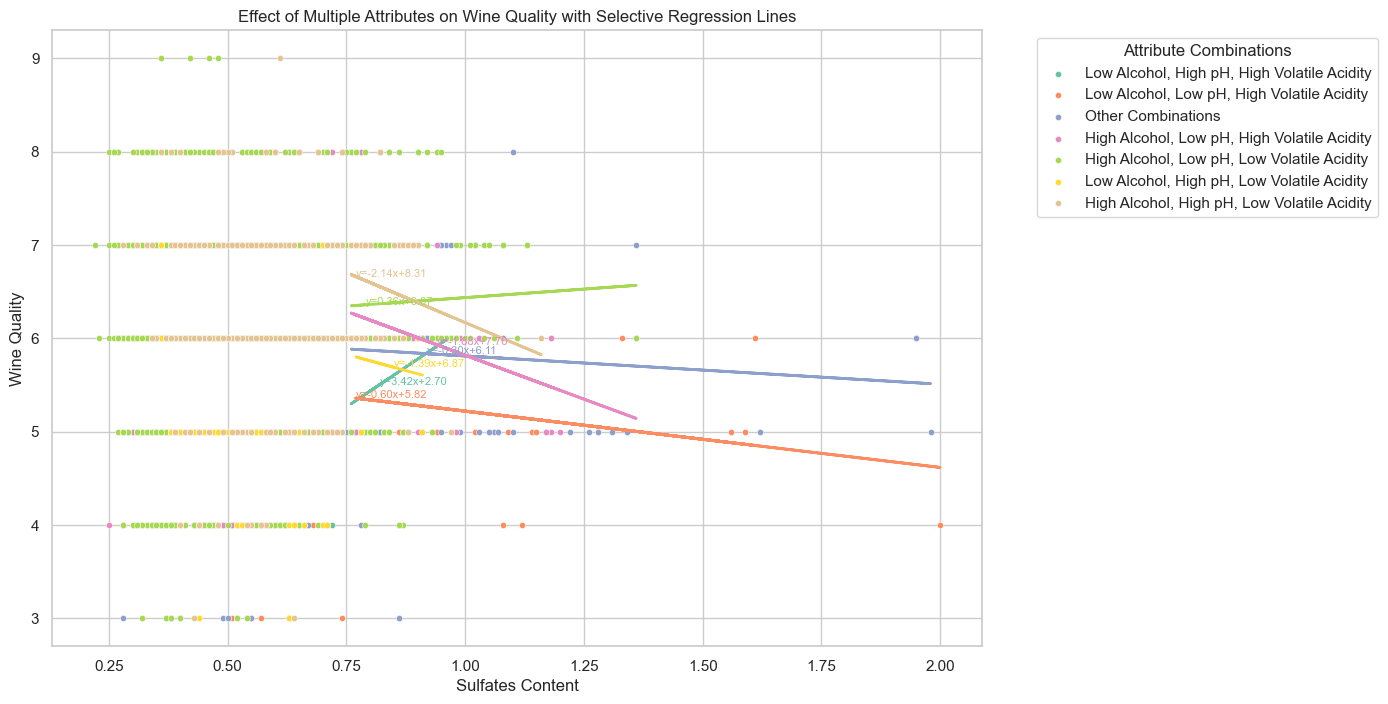

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd

# 加载数据
new_wine_data = pd.read_csv('combined_wine_quality.csv')

# 定义分类函数
def categorize_wine_complete(row):
    if row['alcohol'] > 10 and row['pH'] < 3.4 and row['volatile acidity'] < 0.5:
        return 'High Alcohol, Low pH, Low Volatile Acidity'
    elif row['alcohol'] <= 10 and row['pH'] < 3.4 and row['volatile acidity'] >= 0.5:
        return 'Low Alcohol, Low pH, High Volatile Acidity'
    elif row['alcohol'] > 10 and row['pH'] >= 3.4 and row['volatile acidity'] < 0.5:
        return 'High Alcohol, High pH, Low Volatile Acidity'
    elif row['alcohol'] > 10 and row['pH'] < 3.4 and row['volatile acidity'] >= 0.5:
        return 'High Alcohol, Low pH, High Volatile Acidity'
    elif row['alcohol'] <= 10 and row['pH'] >= 3.4 and row['volatile acidity'] < 0.5:
        return 'Low Alcohol, High pH, Low Volatile Acidity'
    elif row['alcohol'] <= 10 and row['pH'] >= 3.4 and row['volatile acidity'] >= 0.5:
        return 'Low Alcohol, High pH, High Volatile Acidity'
    else:
        return 'Other Combinations'

# 应用分类
new_wine_data['Category'] = new_wine_data.apply(categorize_wine_complete, axis=1)

# 设置图形大小
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# 定义颜色映射
palette = sns.color_palette('Set2', 7)
unique_categories = new_wine_data['Category'].unique()

# 绘制
for idx, category in enumerate(unique_categories):
    category_data = new_wine_data[new_wine_data['Category'] == category]
    high_sulfates_data = category_data[category_data['sulphates'] > 0.75]
    X = high_sulfates_data['sulphates'].values.reshape(-1, 1)
    y = high_sulfates_data['quality'].values
    
    # 计算回归线
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    
    # 散点图和部分回归线
    sns.scatterplot(x='sulphates', y='quality', data=category_data, color=palette[idx], label=f"{category}", s=20)
    plt.plot(X, model.predict(X), color=palette[idx], linewidth=2)
    
    # 回归方程标注
    end_x = X[-1][0]
    end_y = model.predict(X)[-1]
    plt.text(end_x, end_y, f"y={slope:.2f}x+{intercept:.2f}", color=palette[idx], fontsize=8, ha='left')

# 图例和标题
plt.title('Effect of Multiple Attributes on Wine Quality with Selective Regression Lines')
plt.xlabel('Sulfates Content')
plt.ylabel('Wine Quality')
plt.legend(title='Attribute Combinations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


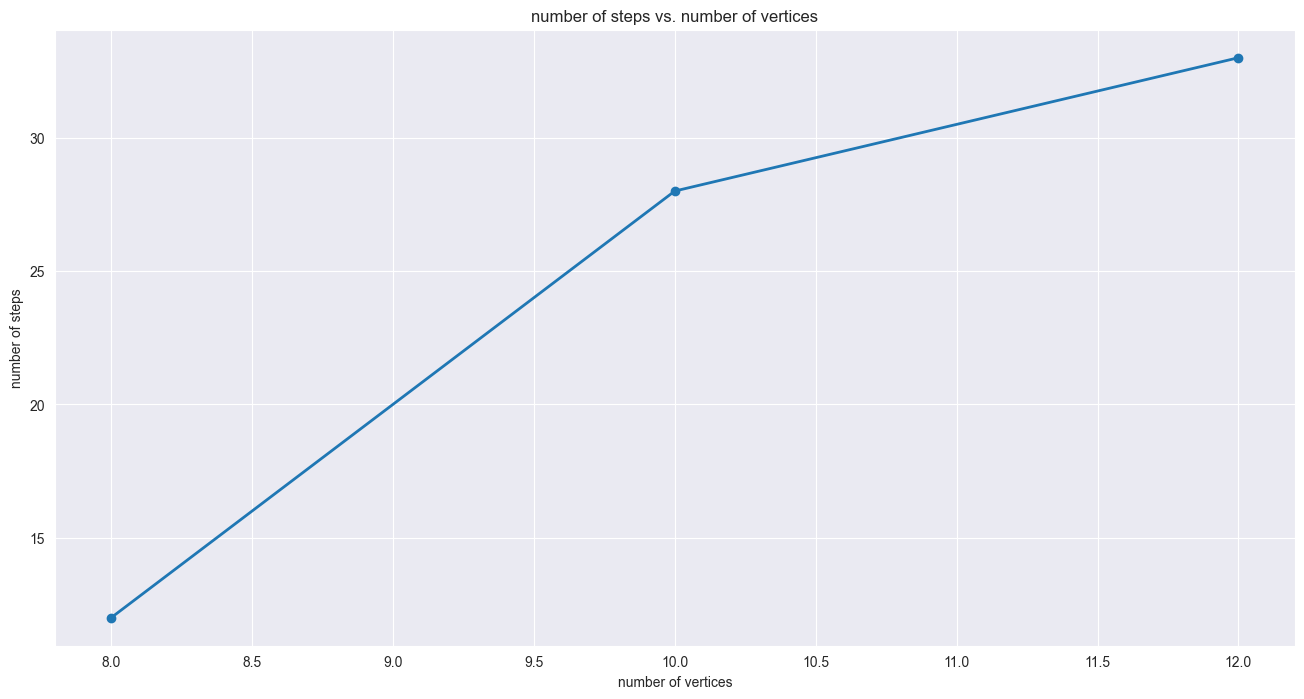

In [3]:
import matplotlib.pyplot as plt

vertices = [8,10,12]
steps = [12,28,33]

plt.figure(figsize=[16,8])
plt.plot(vertices, steps, marker='o',linestyle='-',linewidth = 2)

plt.xlabel('number of vertices')
plt.ylabel('number of steps')
plt.title('number of steps vs. number of vertices')
plt.show()